In [1]:
import pickle
import pandas as pd 
import datetime

pickle_in = open('cupro.pickle', 'rb')  
mem = pickle.load(pickle_in)

mem["monezi"]['EUR']['data']['Predicts'] = [0 for date in mem["monezi"]['EUR']['data']['Data']]
df = pd.DataFrame.from_dict(mem["monezi"]['EUR']['data'])
df.set_index("Data", inplace=True)
df=df.drop(['Predicts'], 1)
df

,Crestere,Valoare
Data,,
2005-01-03,3.9310,3.9310
2005-01-04,-0.0417,3.8893
2005-01-05,-0.0219,3.8674
2005-01-06,0.0046,3.8720
2005-01-07,0.0110,3.8830
2005-01-10,-0.0137,3.8693
2005-01-11,-0.0352,3.8341
2005-01-12,-0.0353,3.7988
2005-01-13,0.0191,3.8179


In [2]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression

forecast_out = 7
forecast_col = "Valoare";
df=df[["Valoare","Crestere"]]
df.fillna(-99999, inplace = True)
df["label"] = df[forecast_col].shift(-forecast_out)  # Value in the future 7 days

x = np.array(df.drop(['label'], 1))  # columns without label 
y = np.array(df['label'])            # array from column label

x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out]

d = np.array ( df.index.values )
d = d[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])  

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.1) # shuffle and use 20% data as test data 

clf = LinearRegression()
clf.fit(x_train, y_train)

accuracy =  clf.score(x_test, y_test)

forecast_set = clf.predict(x_lately)

print (forecast_set, d, accuracy, forecast_out)

w:\venv\venv_dml2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 4.64224675  4.63378178  4.63445042  4.63226631  4.63276759  4.63163068
  4.63322954] ['2017-11-29' '2017-12-04' '2017-12-05' '2017-12-06' '2017-12-07'
 '2017-12-08' '2017-12-11'] 0.989247006587 7


In [3]:
df['Forecast'] = np.nan

for i in range(len(forecast_set) - 1):
    df.loc[d[i]] = [np.nan for _ in range(len(df.columns)-1)] + [forecast_set[i]]

print(df.tail(50), forecast_set) 

            Valoare  Crestere   label  Forecast
Data                                           
2017-09-28   4.5990   -0.0001  4.5780       NaN
2017-09-29   4.5991    0.0001  4.5729       NaN
2017-10-02   4.5871   -0.0120  4.5854       NaN
2017-10-03   4.5860   -0.0011  4.5915       NaN
2017-10-04   4.5772   -0.0088  4.5889       NaN
2017-10-05   4.5782    0.0010  4.5854       NaN
2017-10-06   4.5775   -0.0007  4.5802       NaN
2017-10-09   4.5780    0.0005  4.5841       NaN
2017-10-10   4.5729   -0.0051  4.5921       NaN
2017-10-11   4.5854    0.0125  4.5975       NaN
2017-10-12   4.5915    0.0061  4.5988       NaN
2017-10-13   4.5889   -0.0026  4.5978       NaN
2017-10-16   4.5854   -0.0035  4.5976       NaN
2017-10-17   4.5802   -0.0052  4.5975       NaN
2017-10-18   4.5841    0.0039  4.5980       NaN
2017-10-19   4.5921    0.0080  4.5974       NaN
2017-10-20   4.5975    0.0054  4.5985       NaN
2017-10-23   4.5988    0.0013  4.5984       NaN
2017-10-24   4.5978   -0.0010  4.5981   

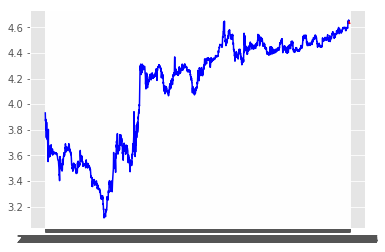

In [13]:
import matplotlib.pyplot as plt 
from matplotlib import style
style.use('ggplot')

plt.plot(df.index.tolist(),df['Valoare'].tolist(),"blue")
plt.plot(df.index.tolist(),df['Forecast'].tolist(),"red")
plt.show()